# SGD Algorithm to predict movie ratings



<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [3]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<h1> TASK:1 </h1>

#### Constructing Adjacency Matrix

In [4]:
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [5]:
n=max(np.unique(data.user_id))+1
m=max(np.unique(data.item_id))+1
A=np.zeros((n,m), dtype=int)
print(n,m)


943 1681


In [6]:
for i in data.values:
    A[i[0]][i[1]]=i[2]

In [7]:
# Adjacency Matrix
A

array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

#### Applying SVD on matrix A to obtain the U, sigma and VT matrices

In [8]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 

U, Sigma, VT = randomized_svd(A, n_components=200, n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)
V=VT.T

(943, 200)
(200,)
(1681, 200)


#### Initialising the bais vectors for users and movies randomly from normal distribution.

In [11]:
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [12]:
B_i=np.random.rand(943)
C_j=np.random.rand(1681)

### Training to find best B_i and C_i

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_j^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

#### Initializing variables

In [13]:
mu=data['rating'].mean()
lr=1e-2
alpha=1
epochs=10

#### Functions to Find Derivative w.r.t B_i

$$
dL/dBi =
\quad
2\alpha ( 
    \ b_i
    )
- 2
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)
$$

In [14]:
def dl_dBi(b_i,c_j,u_i,v_j,y_ij):
    temp=np.dot(u_i.T,v_j)
    return 2*alpha*b_i-2*(y_ij-mu-b_i-c_j-temp)

####  Functions to Find Derivative w.r.t C_j

$$
dL/dCj =
\quad
2\alpha ( 
    \ c_j
    )
- 2
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)
$$

In [15]:
def dl_dCj(b_i,c_j,u_i,v_j,y_ij):
    temp=np.dot(u_i.T,v_j)
    return 2*alpha*C_j-2*(y_ij-mu-b_i-c_j-temp)

#### Training 

In [16]:
MSE=[]
mse_prev=1;
for k in  (range(epochs)):
    for i in data.values:
        b_i=B_i[i[0]]
        c_j=C_j[i[1]]
        u_i=U[i[0]]
        v_j=V[i[1]]
        y_ij=i[2]
        
        # getting the derivatives with respect to b_i and c_j
        dl_dbi=dl_dBi(b_i,c_j,u_i,v_j,y_ij)
        dl_dcj=dl_dBi(b_i,c_j,u_i,v_j,y_ij)
        
        # Updating b_i,c_j
        B_i[i[0]]=B_i[i[0]]-lr*dl_dbi
        C_j[i[1]]=C_j[i[1]]-lr*dl_dcj
        
    
    y_ij_hat=[]
    for i in data.values:
        b_i=B_i[i[0]]
        c_j=C_j[i[1]]
        u_i=U[i[0]]
        v_j=V[i[1]]

        temp=mu+b_i+c_j+np.dot(u_i.T,v_j)
        y_ij_hat.append(temp)

    mse=mean_squared_error(data.rating, y_ij_hat)
    if((abs(mse_prev-mse)/mse_prev)<0.001) :
        break
    mse_prev=mse
    print("Epoch: ",k,":",mse)
    MSE.append(mse)


Epoch:  0 : 0.964933675091534
Epoch:  1 : 0.9181488268959203
Epoch:  2 : 0.9046211967294691
Epoch:  3 : 0.8995164852409829
Epoch:  4 : 0.8974396889983892


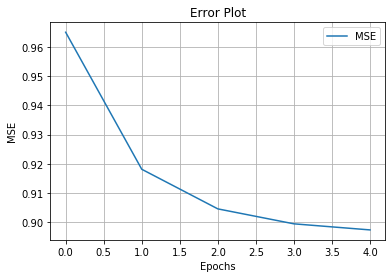

In [17]:
x_epoch=[i for i in range(k)]
plt.plot(x_epoch, MSE, label="MSE")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Error Plot")
plt.grid()
plt.show()

#  Task 2:

In [18]:
data2= pd.read_csv('user_info.csv')
data2.shape

(943, 4)

In [19]:
data2.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [20]:
X=U;
y=data2.is_male.values

In [21]:
# Train/test split data to apply classification algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Hyperparameter Tuning to find best C for Logistic Regression

In [22]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
lr1 = LogisticRegression(random_state=0,max_iter=500)
clf = GridSearchCV(lr1, parameters,scoring='f1')
clf.fit(X_train,y_train)
results=pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006249,0.007653,0.000000,0.000000,1e-05,{'C': 1e-05},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
1,0.000000,0.000000,0.005426,0.006772,0.0001,{'C': 0.0001},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
2,0.000000,0.000000,0.003126,0.006252,0.001,{'C': 0.001},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
3,0.003129,0.006258,0.000000,0.000000,0.01,{'C': 0.01},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
4,0.000000,0.000000,0.003129,0.006258,0.1,{'C': 0.1},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
5,0.007550,0.006999,0.000000,0.000000,1,{'C': 1},0.829493,0.833333,0.827907,0.827907,0.827907,0.829309,0.002104,2
6,0.009311,0.008628,0.000601,0.000802,10,{'C': 10},0.811321,0.826923,0.857143,0.823529,0.832536,0.830290,0.015119,1
7,0.019264,0.004504,0.000000,0.000000,100,{'C': 100},0.808081,0.813187,0.806630,0.782609,0.838710,0.809843,0.017886,8
8,0.055422,0.009758,0.000409,0.000817,1000,{'C': 1000},0.806283,0.813187,0.783626,0.734463,0.797688,0.787049,0.028083,9


### Best Hyperparameter for training

In [24]:
best_C=clf.best_params_['C']
best_C

10

### Training with best hyperparameter

In [25]:
lr_=LogisticRegression(C=best_C,max_iter=500).fit(X_train, y_train)

In [26]:
# Predicted Value
y_pred=lr_.predict(X_test)

In [28]:
# calculating Mean square error
mse_lr=mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse_lr)

Mean Squared Error:  0.2564102564102564


### Printing Confusing matrix

In [29]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[ 24,  65],
       [ 15, 208]], dtype=int64)

### Conclusion

<p> We can see that the User matrix featurisation that we obtained from SVD is performing quite well in predicting the gender of the user with MSE = 0.256</p> 

<p>

### Applying SGD for recommendation system  after Normalising U(User Matrix) and V(Item Matrix)

#### Normalizing User matrix

In [31]:
from sklearn.preprocessing import Normalizer
normalizer_U=Normalizer()
U=normalizer_U.fit_transform(U)
U

array([[ 0.08640271,  0.01029192, -0.01634916, ..., -0.04015678,
        -0.02687022,  0.01747944],
       [ 0.04026194, -0.14428045,  0.1668799 , ..., -0.09938937,
         0.08556978, -0.15432167],
       [ 0.02027543, -0.09368377,  0.07466926, ...,  0.06048021,
        -0.00515134, -0.06537516],
       ...,
       [ 0.02867392, -0.100791  ,  0.02461513, ..., -0.00043567,
        -0.00970243, -0.02189203],
       [ 0.04592986,  0.00822705,  0.04787223, ...,  0.0975489 ,
        -0.09033398,  0.05530162],
       [ 0.07458974, -0.00484077, -0.10452043, ...,  0.01343355,
         0.12689668, -0.0761227 ]])

#### Normalizing Item Matrix

In [33]:
from sklearn.preprocessing import Normalizer
normalizer_V=Normalizer()
V=normalizer_V.fit_transform(V)
V

array([[ 0.11176055, -0.11097293, -0.00605184, ...,  0.06328592,
        -0.03491599,  0.00677097],
       [ 0.07861628, -0.01522179, -0.13737885, ...,  0.00291477,
         0.07314408, -0.03416641],
       [ 0.05535981, -0.07051791, -0.03214025, ..., -0.08229548,
        -0.13219517,  0.12801568],
       ...,
       [ 0.00281111, -0.04214132,  0.04742856, ..., -0.12968693,
        -0.09453178,  0.03178162],
       [ 0.00804536,  0.00273229, -0.0097731 , ...,  0.16962289,
         0.02779956, -0.00923656],
       [ 0.00809868,  0.00660892, -0.00780998, ..., -0.22814241,
         0.09825382, -0.11468601]])

In [40]:
# Random Initialisation of Bais vectors for users and items
B_i=np.random.rand(943)
C_j=np.random.rand(1681)

### Applying SGD after normalising features U and V

In [41]:
MSE=[]
mse_prev=1;
for k in  (range(epochs)):
    for i in data.values:
        b_i=B_i[i[0]]
        c_j=C_j[i[1]]
        u_i=U[i[0]]
        v_j=V[i[1]]
        y_ij=i[2]
        
        # getting the derivatives with respect to b_i and c_j
        dl_dbi=dl_dBi(b_i,c_j,u_i,v_j,y_ij)
        dl_dcj=dl_dBi(b_i,c_j,u_i,v_j,y_ij)
        
        # Updating b_i,c_j
        B_i[i[0]]=B_i[i[0]]-lr*dl_dbi
        C_j[i[1]]=C_j[i[1]]-lr*dl_dcj
        
    
    y_ij_hat=[]
    for i in data.values:
        b_i=B_i[i[0]]
        c_j=C_j[i[1]]
        u_i=U[i[0]]
        v_j=V[i[1]]

        temp=mu+b_i+c_j+np.dot(u_i.T,v_j)
        y_ij_hat.append(temp)

    mse=mean_squared_error(data.rating, y_ij_hat)
    if((abs(mse_prev-mse)/mse_prev)<0.001) :
        break
    mse_prev=mse
    print("Epoch: ",k,":",mse)
    MSE.append(mse)


Epoch:  0 : 0.9472836901144063
Epoch:  1 : 0.8907128611299193
Epoch:  2 : 0.8745494807880269
Epoch:  3 : 0.8690011067412411
Epoch:  4 : 0.8673085153489173


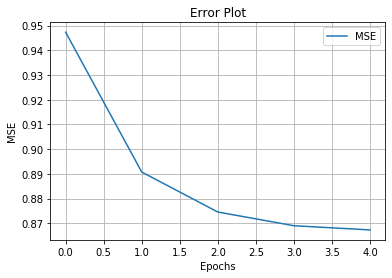

In [43]:
x_epoch=[i for i in range(k)]
plt.plot(x_epoch, MSE, label="MSE")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Error Plot")
plt.grid()
plt.show()

#### we see that after normalizing matrices U and V we get a slightly lower MSE

<h1 style="text-align: center; color: Red;"> End </h1>